In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#filenames = ['Google_dest.parquet', 'Facebook_dest.parquet', 'Neptun_dest.parquet']
filename = 'Facebook_dest.parquet'

In [28]:
# for file in filenames:
#     df = pd.read_parquet(filenames[0])
#     df.rename(columns={'timestamp' : 'date'}, inplace=True)
#     df['timestamp'] = df.date.values.astype(np.int64) / 10 ** 9
#     df['difference'] = df.date.diff().dt.total_seconds()
#     newFile = file.split('.')[0] + '_new.parquet'
#     df.to_parquet(newFile)
df = pd.read_parquet(filename)
df.rename(columns={'timestamp' : 'date'}, inplace=True)
df['timestamp'] = df.date.values.astype(np.int64) / 10 ** 9
df['difference'] = df.date.diff().dt.total_seconds()
newFile = filename.split('.')[0] + '_new.parquet'
df.to_parquet(newFile)

/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [30]:
# df = pd.read_parquet(filename)

In [31]:
# df.rename(columns={'timestamp' : 'date'}, inplace=True)

In [32]:
# df['timestamp'] = df.date.values.astype(np.int64) / 10 ** 9

In [33]:
# df['difference'] = df.date.diff().dt.total_seconds()

In [34]:
#df.difference.value_counts().iloc[:50].plot.bar(figsize=(20,10))

In [35]:
# df[(df['date'] >= '2018-10-15 12:00:00') & (df['date'] <= '2018-10-15 13:00:00')]#['timestamp'].iloc[0]

In [28]:
df = pd.read_parquet('tcp5tuple_http.parquet')

/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [12]:
df.head()

,load
timeMin,
2018-10-15 11:28:00,29722
2018-10-15 11:29:00,33750
2018-10-15 11:30:00,36650
2018-10-15 11:31:00,38162
2018-10-15 11:32:00,36301


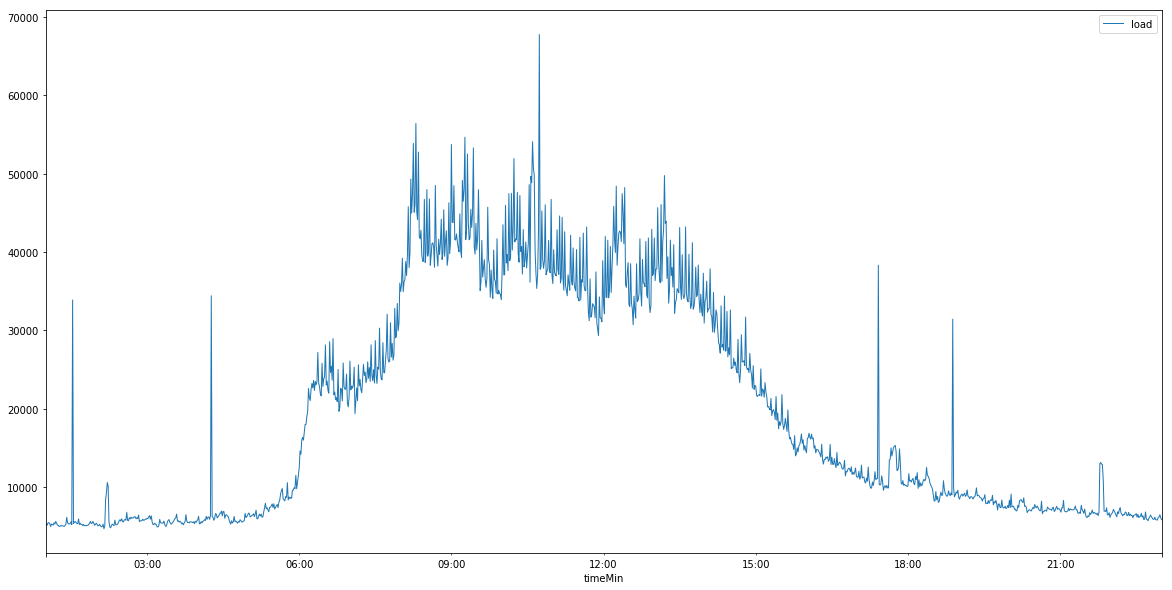

In [13]:
df.loc['2018-10-17 01:00' : '2018-10-17 23:00'].plot(figsize=(20,10), linewidth=1.0)

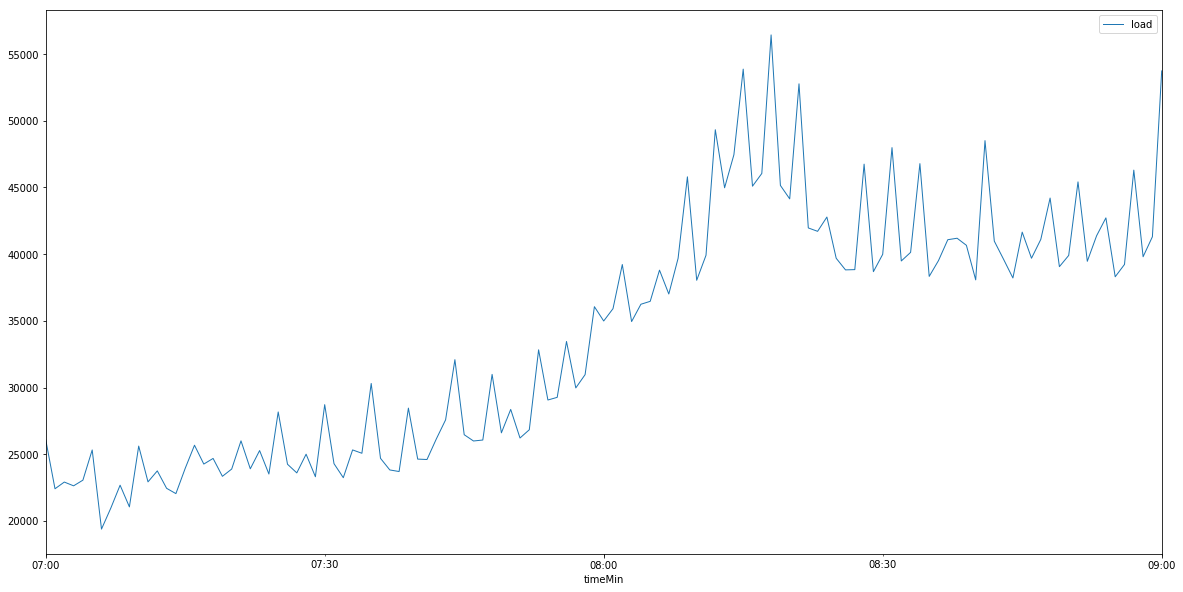

In [14]:
df.loc['2018-10-17 07:00' : '2018-10-17 09:00'].plot(figsize=(20,10), linewidth=1.0)

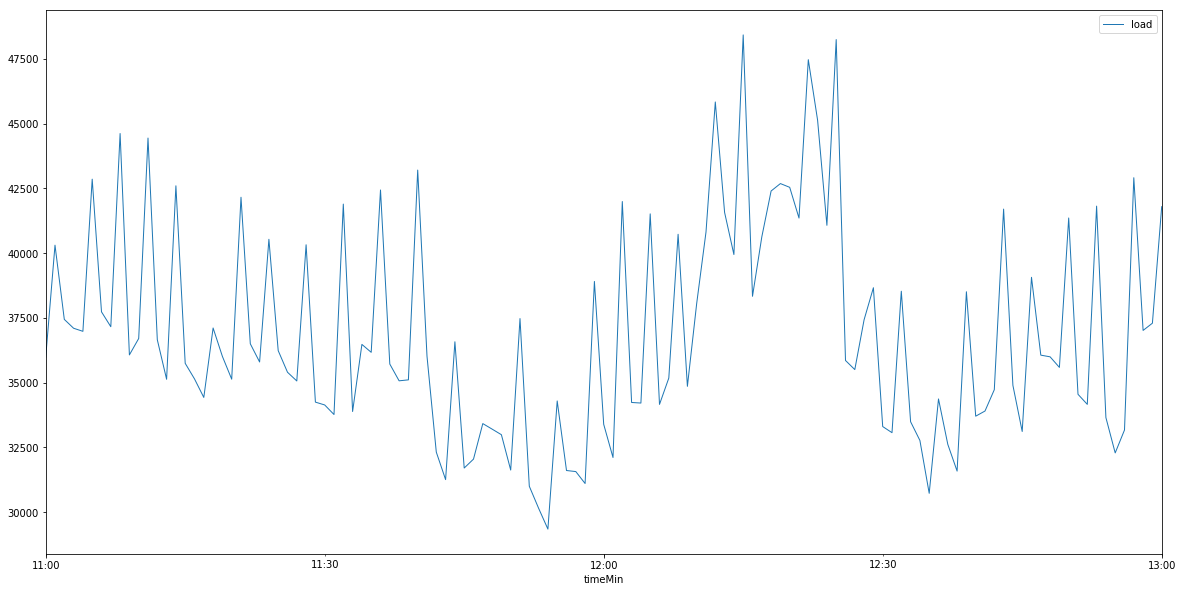

In [15]:
df.loc['2018-10-17 11:00' : '2018-10-17 13:00'].plot(figsize=(20,10), linewidth=1.0)

## teljes load szetszedese keresekre

In [29]:
df_de = df.loc['2018-10-17 07:00' : '2018-10-17 09:00']
df_du = df.loc['2018-10-17 11:00' : '2018-10-17 13:00']

In [30]:
# df_du_agg = df_du.index.to_frame(name="time")
# df_du_agg["count"] = df_du
# df_de_agg = df_de.index.to_frame(name="time")
# df_de_agg["count"] = df_de
df_de.describe()

,load
count,121.000000
mean,33959.115702
std,9144.588732
min,19385.000000
25%,25070.000000
50%,34987.000000
75%,40660.000000
max,56435.000000


In [31]:
import time
time.time()

1564097287.1747932

In [55]:
start_time = time.time()
df_de_sep = pd.DataFrame(columns=['timestamp'])
timestamp = []
ind = 0
for index, row in df_de.iterrows():
    timestamp +=[float("{0:.3f}".format(index.timestamp() + i * (60/row.load))) for i in range(0, row.load)]
    print(ind)
    ind += 1
data = {"timestamp" : timestamp}
df_de_sep = pd.DataFrame(data)
print(1)
df_de_sep["date"] = df_de_sep.apply(lambda row: pd.Timestamp.fromtimestamp(row.timestamp), axis=1)
print(2)
df_de_sep["difference"] = df_de_sep.date.diff().dt.total_seconds()
print(3)
df_de_sep['timestamp_start'] = df_de_sep['timestamp'] - df_de_sep['timestamp'].iloc[0]
print(4)
df_de_sep.to_parquet("tcp5tuple_http_de.parquet")

end_time = time.time()
print(end_time - start_time)
df_de_sep

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
1
2
3
4
276.87028980255127


,timestamp,date,difference,timestamp_start
0,1.539760e+09,2018-10-17 09:00:00.000,NaN,0.000
1,1.539760e+09,2018-10-17 09:00:00.002,0.002,0.002
2,1.539760e+09,2018-10-17 09:00:00.005,0.003,0.005
3,1.539760e+09,2018-10-17 09:00:00.007,0.002,0.007
4,1.539760e+09,2018-10-17 09:00:00.009,0.002,0.009
5,1.539760e+09,2018-10-17 09:00:00.011,0.002,0.011
6,1.539760e+09,2018-10-17 09:00:00.014,0.003,0.014
7,1.539760e+09,2018-10-17 09:00:00.016,0.002,0.016
8,1.539760e+09,2018-10-17 09:00:00.018,0.002,0.018
9,1.539760e+09,2018-10-17 09:00:00.021,0.003,0.021


In [56]:
# print(df_de_sep.iloc[0].timestamp)
# print(float("{0:.3f}".format(df_de_sep.iloc[0].timestamp)))

In [57]:
start_time = time.time()
df_du_sep = pd.DataFrame(columns=['timestamp'])
timestamp = []
ind = 0
for index, row in df_du.iterrows():
    timestamp +=[float("{0:.3f}".format(index.timestamp() + i * (60/row.load))) for i in range(0, row.load)]
    print(ind)
    ind += 1
data = {"timestamp" : timestamp}
df_du_sep = pd.DataFrame(data)
print(1)
df_du_sep["date"] = df_du_sep.apply(lambda row: pd.Timestamp.fromtimestamp(row.timestamp), axis=1)
print(2)
df_du_sep["difference"] = df_du_sep.date.diff().dt.total_seconds()
print(3)
df_du_sep['timestamp_start'] = df_du_sep['timestamp'] - df_du_sep['timestamp'].iloc[0]
print(4)
df_du_sep.to_parquet("tcp5tuple_http_du.parquet")

end_time = time.time()
print(end_time - start_time)
df_du_sep

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
1
2
3
4
337.95498394966125


,timestamp,date,difference,timestamp_start
0,1.539774e+09,2018-10-17 13:00:00.000,NaN,0.000
1,1.539774e+09,2018-10-17 13:00:00.002,0.002,0.002
2,1.539774e+09,2018-10-17 13:00:00.003,0.001,0.003
3,1.539774e+09,2018-10-17 13:00:00.005,0.002,0.005
4,1.539774e+09,2018-10-17 13:00:00.007,0.002,0.007
5,1.539774e+09,2018-10-17 13:00:00.008,0.001,0.008
6,1.539774e+09,2018-10-17 13:00:00.010,0.002,0.010
7,1.539774e+09,2018-10-17 13:00:00.012,0.002,0.012
8,1.539774e+09,2018-10-17 13:00:00.013,0.001,0.013
9,1.539774e+09,2018-10-17 13:00:00.015,0.002,0.015


In [62]:
data_all_de = {}
data_all_de["load_send_time"] = df_de_sep.timestamp_start.to_list()
data_all_de["load_wait_time"] = df_de_sep.difference.to_list()[1:]
metadata_all_de = {"load_from" : "all", 
                  "measurement_length" : 2, 
                  "time_period_start" : "2018-10-17 07:00:00",
                  "time_period_end" : "2018-10-17 09:00:00"}
all_de_json = {"metadata" : metadata_all_de, "data" : data_all_de}

In [64]:
data_all_du = {}
data_all_du["load_send_time"] = df_du_sep.timestamp_start.to_list()
data_all_du["load_wait_time"] = df_du_sep.difference.to_list()[1:]
metadata_all_du = {"load_from" : "all", 
                  "measurement_length" : 2, 
                  "time_period_start" : "2018-10-17 11:00:00",
                  "time_period_end" : "2018-10-17 13:00:00"}
all_du_json = {"metadata" : metadata_all_du, "data" : data_all_du}

In [63]:
with open('tcp5tuple_http_de.json', 'w') as f:
    json.dump(all_de_json, f)

In [65]:
with open('tcp5tuple_http_du.json', 'w') as f:
    json.dump(all_du_json, f)

## Facebook load file szetszedese

In [2]:
#df1 = pd.read_parquet('Facebook_dest_new.parquet')
df2 = pd.read_parquet('Facebook_dest.parquet')
#df3 = pd.read_parquet('Google_dest_new.parquet')

/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [3]:
df2.tail()

,timestamp
14235579,2018-10-21 23:58:09.117
14235580,2018-10-21 23:58:09.185
14235581,2018-10-21 23:58:09.235
14235582,2018-10-21 23:58:09.235
14235583,2018-10-21 23:58:09.609


In [4]:
#asd = df2.date.dt.floor('min')#.groupby('timestamp')
asd = df2.timestamp.dt.floor('S')#.groupby('timestamp')

In [5]:
asd = asd.to_frame().groupby(by='timestamp').size()

In [6]:
asd.head()

timestamp
2018-10-15 11:28:09     10
2018-10-15 11:28:10     44
2018-10-15 11:28:11     81
2018-10-15 11:28:12    125
2018-10-15 11:28:13     95
dtype: int64

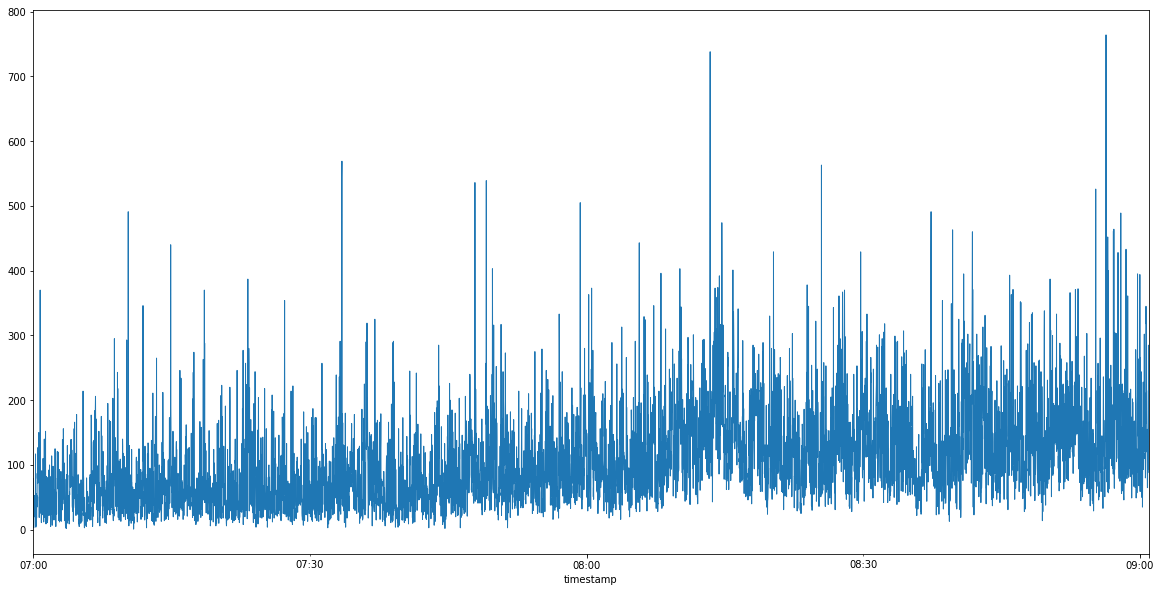

In [7]:
asd.loc['2018-10-17 07:00' : '2018-10-17 09:00'].plot(figsize=(20,10), linewidth=1.0)
#asd.plot(figsize=(20,10), linewidth=1.0)

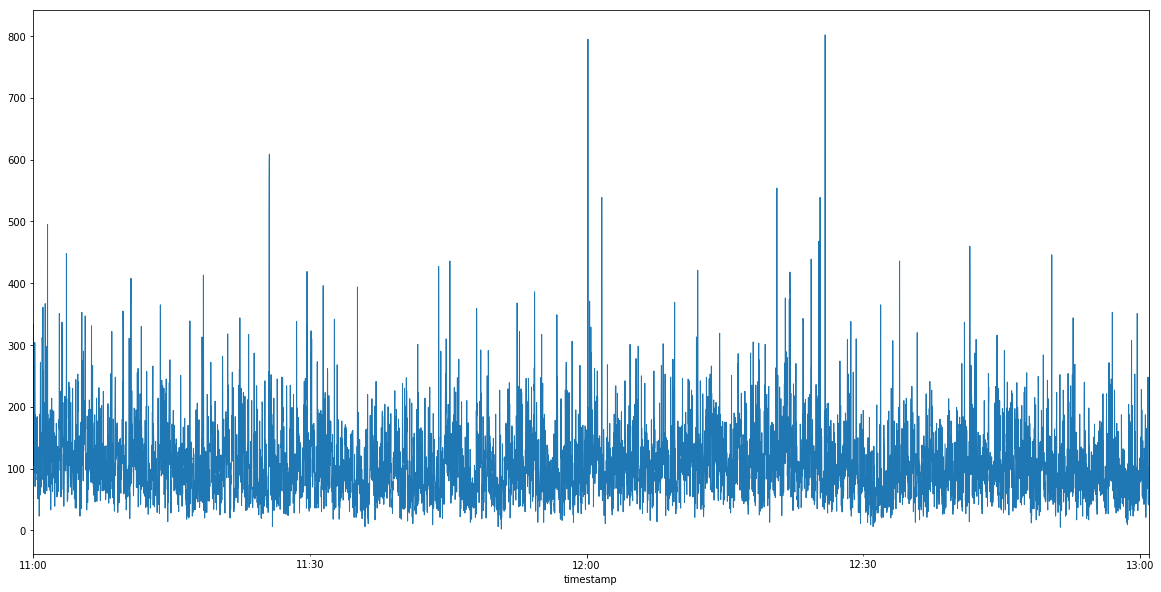

In [8]:
asd.loc['2018-10-17 11:00' : '2018-10-17 13:00'].plot(figsize=(20,10), linewidth=1.0)

In [9]:
asd.loc['2018-10-17 11:00' : '2018-10-17 13:00'].describe()

count    7260.000000
mean      108.586639
std        60.919001
min         2.000000
25%        67.000000
50%        97.000000
75%       136.000000
max       802.000000
dtype: float64

In [10]:
asd.loc['2018-10-17 07:00' : '2018-10-17 09:00'].describe()

count    7260.00000
mean      105.56708
std        71.15185
min         1.00000
25%        54.00000
50%        90.00000
75%       141.00000
max       764.00000
dtype: float64

## Facebook Slicing es exportalas

In [36]:
df_fb = pd.read_parquet('Facebook_dest.parquet')

/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [37]:
# df_fb.loc['2018-10-17 07:00' : '2018-10-17 09:00'].head(10)
df_fb_de = df_fb[(df_fb['timestamp'] >= '2018-10-17 07:00:00') & (df_fb['timestamp'] <= '2018-10-17 09:00:00')]
df_fb_du = df_fb[(df_fb['timestamp'] >= '2018-10-17 11:00:00') & (df_fb['timestamp'] <= '2018-10-17 13:00:00')]

In [38]:
df_fb_de.columns = ["date"]

df_fb_du.columns = ["date"]

df_fb_de['timestamp'] = df_fb_de.date.values.astype(np.int64) / 10 ** 9
df_fb_de['difference'] = df_fb_de.date.diff().dt.total_seconds()

df_fb_du['timestamp'] = df_fb_du.date.values.astype(np.int64) / 10 ** 9
df_fb_du['difference'] = df_fb_du.date.diff().dt.total_seconds()

df_fb_de['timestamp_start'] = df_fb_de['timestamp'] - df_fb_de['timestamp'].iloc[0]

df_fb_du['timestamp_start'] = df_fb_du['timestamp'] - df_fb_du['timestamp'].iloc[0]

df_fb_de.to_parquet("Facebook_dest_de.parquet")

df_fb_du.to_parquet("Facebook_dest_du.parquet")

/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nad/anaconda3/envs/bigdata/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [59]:
df_fb_de = pd.read_parquet('Facebook_dest_de.parquet')
df_fb_du = pd.read_parquet('Facebook_dest_du.parquet')

In [60]:
data_fb_de = {}
data_fb_de["load_send_time"] = df_fb_de.timestamp_start.to_list()
data_fb_de["load_wait_time"] = df_fb_de.difference.to_list()[1:]
metadata_fb_de = {"load_from" : "facebook", 
                  "measurement_length" : 2, 
                  "time_period_start" : "2018-10-17 07:00:00",
                  "time_period_end" : "2018-10-17 09:00:00"}
fb_de_json = {"metadata" : metadata_fb_de, "data" : data_fb_de}

data_fb_du = {}
data_fb_du["load_send_time"] = df_fb_du.timestamp_start.to_list()
data_fb_du["load_wait_time"] = df_fb_du.difference.to_list()[1:]
metadata_fb_du = {"load_from" : "facebook", 
                  "measurement_length" : 2, 
                  "time_period_start" : "2018-10-17 11:00:00",
                  "time_period_end" : "2018-10-17 13:00:00"}
fb_du_json = {"metadata" : metadata_fb_du, "data" : data_fb_du}

In [58]:
import json

In [61]:
with open('Facebook_dest_de.json', 'w') as f:
    json.dump(fb_de_json, f)
with open('Facebook_dest_du.json', 'w') as f:
    json.dump(fb_du_json, f)

In [33]:
df_fb_du

NameError: name 'df_fb_du' is not defined

In [38]:
test = pd.read_parquet('Facebook_dest.parquet')
test.columns = ["date"]


test['timestamp'] = test.date.values.astype(np.int64) / 10 ** 9
test['difference'] = test.date.diff().dt.total_seconds()

test['timestamp_start'] = test['timestamp'] - test['timestamp'].iloc[0]

test

,date,timestamp,difference,timestamp_start
0,2018-10-15 11:28:09.254,1.539603e+09,NaN,0.000
1,2018-10-15 11:28:09.259,1.539603e+09,0.005,0.005
2,2018-10-15 11:28:09.571,1.539603e+09,0.312,0.317
3,2018-10-15 11:28:09.572,1.539603e+09,0.001,0.318
4,2018-10-15 11:28:09.572,1.539603e+09,0.000,0.318
5,2018-10-15 11:28:09.578,1.539603e+09,0.006,0.324
6,2018-10-15 11:28:09.679,1.539603e+09,0.101,0.425
7,2018-10-15 11:28:09.686,1.539603e+09,0.007,0.432
8,2018-10-15 11:28:09.686,1.539603e+09,0.000,0.432
9,2018-10-15 11:28:09.777,1.539603e+09,0.091,0.523
